In [2]:
import pandas as pd, numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform, choice
from time import time
import warnings; warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Cloudy\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Cloudy\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Cloudy\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
class kMeans_PP:

    
    def __init__(self, df, K, max_iter, target):
        """
            We need to have two variables as initial variables
            - df             --> data as a data frame.
            - K              --> number of clusters.
            - max_iterations --> This shows the max number of iterations 
                                    after which the algorithm will stop.
        """
        self.K = K
        self.max_iter = max_iter
        self.df = df.copy()
        self.df_w_labels = df.copy()        
        self.c_labels = []
        self.centroids = self.initialize_centroids()
        self.SSE_values = []
        

    def initialize_centroids(self):     
        """
            Probabilistic initialization for Centroids
        """
        # Selecting the first cluster
        min_ = np.min(self.df, axis=0)
        max_ = np.max(self.df, axis=0)        
        first_cluster = uniform(min_, max_)
        cluster_centers = []; cluster_centers.append(first_cluster)
        
        # Selecting the remaining "K-1" clusters
        for i in range(0, self.K-1):
            distances = np.zeros(self.df.shape[0])            
            # Finding Distances
            for index,row in self.df.iterrows():
                row_ = np.array(row)
                distances[index] = self.eucledian_distance(cluster_centers[-1], row_)                
            prob = distances/np.sum(distances)
            selected_centroid = np.array(self.df.iloc[choice(self.df.shape[0], p=prob)])
            cluster_centers.append(selected_centroid)
        return cluster_centers

    def eucledian_distance(self, point1, point2):
        e_dist = np.sqrt(np.sum(np.square(point1 - point2)))        
        return e_dist
    
    
    def assign_cluster_labels(self):
        label = []
        for index,row in self.df.iterrows():
            row_ = np.array(row)
            dist = []            
            for cluster in self.centroids:                
                edist=self.eucledian_distance(cluster, row_)
                dist.append(edist)                
            label.append(np.argmin(dist, axis=0))            
        self.c_labels = label

    
    def updating_cluster_centroid(self):      
        n_samples, n_variables = self.df.shape        
        new_centroids = np.zeros(shape=(self.K, self.df.shape[1]))        
        for i in range(self.K):            
            temp_df = self.df_w_labels[self.df_w_labels['labels'] == i]           
            for j in range(n_variables):
                if not np.isnan(temp_df.iloc[:,j].mean()):
                    new_centroids[i][j] = temp_df.iloc[:,j].mean()
                else:
                    new_centroids[i][j] = 0
        self.centroids = new_centroids       
        return new_centroids    
    

    
    def sse(self):
        """
            Calculate Sum of Square Errors
            Variables used:
            - self.centroids
            - df_w_labels
            - 
        """
        sums = 0
        print(f"Unique_labels = {self.df_w_labels['labels'].unique()}")
        for i in self.df_w_labels['labels'].unique():       
            centroid = self.centroids[i]            
            temp_df = self.df_w_labels[self.df_w_labels['labels'] == i]
            temp_df.drop('labels', axis=1, inplace=True)            
            if len(centroid) > temp_df.shape[1]:    
                centroid = centroid[:-1].copy()
            sums_ = 0
            for index, row in temp_df.iterrows():
                r = np.array(row)
                sums_ += np.sum(np.square(r-centroid))
            
            # The below statement forbits the sum of interger and nan values
            if not np.isnan(sums_):
                sums += sums_
            
            # print(f"sums_ = {sums} AND sums = {sums}")
            # sums += self.sse(temp_df, centroid) 
        
        self.SSE_values.append(sums)
        return sums
        
    def stopping_condition(self):
        """
            Returns: Boolean for Stopping Condition
        """
        pass
    
    def fit(self):
        self.assign_cluster_labels()                   # Assigning the Clusters intitally
        self.df_w_labels['labels'] = self.c_labels     # adding labels to the dataframe.
        
        for i in range(self.max_iter):
            print(f' Iteration --> {i+1} ; SSE -->  {self.sse()} ')
            print("------------------------------------------------------------")
            self.updating_cluster_centroid()
            self.assign_cluster_labels()
            self.df_w_labels['labels'] = self.c_labels
        
       

In [4]:
path1 = r"G:\My Drive\[Study]\Data Mining\DM HW 4\Dataset 1 - dataset_diabetes\diabetes_clean.csv"
diabetes = pd.read_csv(path1)
diabetes.drop('Unnamed: 0', axis=1, inplace=True)
Y = diabetes['readmitted']
X = diabetes.drop('readmitted', axis=1)

In [5]:
sse_dict = dict()
start_time = time()
for k in range(2,6):
    print("K ==> ",k)
    kmeans_pp = kMeans_PP(X, K=k,max_iter=20, target=Y)
    kmeans_pp.fit() 
    sse_dict[k] = kmeans_pp.SSE_values
    print("==============================================================================================")
    
end_time = time()
kmeans_run_time = end_time-start_time
print(f"KMeans++ Run time --> {kmeans_run_time} seconds")

K ==>  2
Unique_labels = [1 0]
------------------------------------------------------------
 Iteration --> 1 ; SSE -->  129003692.12304854 
------------------------------------------------------------
Unique_labels = [1 0]
------------------------------------------------------------
 Iteration --> 2 ; SSE -->  38818300.645803645 
------------------------------------------------------------
Unique_labels = [0 1]
------------------------------------------------------------
 Iteration --> 3 ; SSE -->  32426112.040199794 
------------------------------------------------------------
Unique_labels = [0 1]
------------------------------------------------------------
 Iteration --> 4 ; SSE -->  29308473.631066896 
------------------------------------------------------------
Unique_labels = [0 1]
------------------------------------------------------------
 Iteration --> 5 ; SSE -->  28061556.097730402 
------------------------------------------------------------
Unique_labels = [0 1]
---------

Unique_labels = [3 2 1 0]
------------------------------------------------------------
 Iteration --> 3 ; SSE -->  19433201.481623407 
------------------------------------------------------------
Unique_labels = [3 2 1 0]
------------------------------------------------------------
 Iteration --> 4 ; SSE -->  19313331.22474496 
------------------------------------------------------------
Unique_labels = [3 2 1 0]
------------------------------------------------------------
 Iteration --> 5 ; SSE -->  19266236.306854695 
------------------------------------------------------------
Unique_labels = [3 2 1 0]
------------------------------------------------------------
 Iteration --> 6 ; SSE -->  19243152.120747965 
------------------------------------------------------------
Unique_labels = [3 2 1 0]
------------------------------------------------------------
 Iteration --> 7 ; SSE -->  19230676.4871486 
------------------------------------------------------------
Unique_labels = [3 2 1 

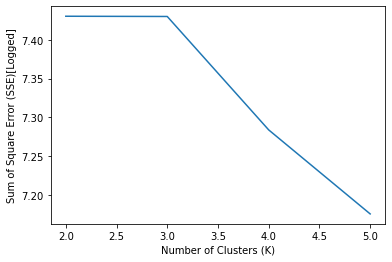

In [6]:
sse_val = []
k_val = [2,3,4,5]
for key, val in sse_dict.items():
    sse_val.append(val[-1])

sns.lineplot(x=k_val, y=np.log10(sse_val))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Error (SSE)")
plt.show()


In [30]:
import plotly.express as px
import plotly.graph_objs as go
k_values = []; e_values = []
for key, val in sse_dict.items():
    for i in range(len(val)):
        k_values.append(key)
    e_values.extend(val)
e_dict = {'k_values':k_values, 'e_values':e_values}
error_df = pd.DataFrame(e_dict)
error_df['e_values'] = np.log10(error_df['e_values'])
fig = px.box(error_df, 
             x='k_values', 
             y='e_values', 
             color='k_values', 
             title='K-Means++ on Diabetes Dataset')

# customize the boxplot
fig.update_layout(xaxis_title='Number of Clusters (K)', 
                  yaxis_title='Sum of Square Errors [Logged]')
fig.show()


,k_values,e_values
0,2,8.110602
1,2,7.589037
2,2,7.510895
3,2,7.466993
4,2,7.448112
